In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import lstm

In [2]:
mice = ["mpfc14", "mpfc19", "mpfc20", "mpfc23", "mpfc24", "mpfc30"]
days = ["yd1", "yd2", "yd6"]

In [3]:
with open("no_filt/h_spike_Wlim001.pkl", "rb") as f:
    h = pickle.load(f)

In [12]:
beh = []
for mi, mouse in enumerate(mice):
    behs = []
    for di, day in enumerate(days):
        df = pd.read_csv("behavior/" + mouse + "/" +mouse + "_" + day + ".csv", header=None).values
        
        n = np.sum(~np.isnan(df).any(axis=1))
        df = df[:n]
        t = np.zeros(n)
        for i in range(1, n-1):
            if df[i, 0] == 1:
                t[i] = 1
            else:
                if df[i-1, 0] == 1 and df[i+1, 0] == 1:
                    t[i] = 1
        df[:, 0] = t.copy()
        
        # remove "just-in-case" lick
        count = 0
        for i in range(n):
            if df[i, 2] == 1:
                count = 0
            elif df[i, 1] == 1:
                if count < 50:
                    df[i, 1] = 0
                count = 0
            else:
                count += 1
        
        behs.append(df)
    beh.append(behs)

In [13]:
with open("params.pkl", "rb") as f:
    params = pickle.load(f)
with open("n_beh.pkl", "rb") as f:
    n_beh = pickle.load(f)

In [6]:
preds = []
for mi, mouse in enumerate(mice):
    preds_s = []
    for di, day in enumerate(days):
        print(mouse, day)
        model = lstm.Decoder(params[mi][di])
        preds_s.append(model.predict(h[mi][di])[49:])
    preds.append(preds_s)

mpfc14 yd1
mpfc14 yd2
mpfc14 yd6
mpfc19 yd1
mpfc19 yd2
mpfc19 yd6
mpfc20 yd1
mpfc20 yd2
mpfc20 yd6
mpfc23 yd1
mpfc23 yd2
mpfc23 yd6
mpfc24 yd1
mpfc24 yd2
mpfc24 yd6
mpfc30 yd1
mpfc30 yd2
mpfc30 yd6


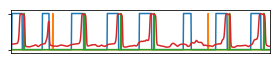

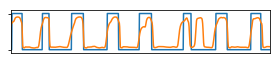

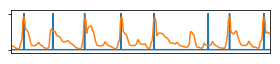

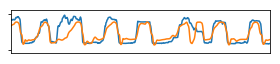

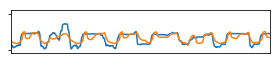

In [115]:
start = 4800 #7600 for validation data
plt.figure(figsize=(4, 1))
plt.plot(beh[4][2][start:start+800, 0])
plt.plot(beh[4][2][start:start+800, 1])
plt.plot(beh[4][2][start:start+800, 2])
plt.plot(preds[4][2][start:start+800, 2])
plt.tick_params(labelleft=False, bottom=False, labelbottom=False)
plt.xlim(0, 800)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
plt.tight_layout()
plt.savefig("paper/fig4/decode_Reward_" + str(start) + ".png")
plt.show()
plt.figure(figsize=(4, 1))
plt.plot(beh[4][2][start:start+800, 0])
plt.plot(preds[4][2][start:start+800, 0])
plt.tick_params(labelleft=False, bottom=False, labelbottom=False)
plt.xlim(0, 800)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
plt.tight_layout()
plt.savefig("paper/fig4/decode_Zone_" + str(start) + ".png")
plt.show()
plt.figure(figsize=(4, 1))
plt.plot(beh[4][2][start:start+800, 1])
plt.plot(preds[4][2][start:start+800, 1])
plt.tick_params(labelleft=False, bottom=False, labelbottom=False)
plt.xlim(0, 800)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
plt.tight_layout()
plt.savefig("paper/fig4/decode_Lick_" + str(start) + ".png")
plt.show()
plt.figure(figsize=(4, 1))
plt.plot(beh[4][2][start:start+800, 3])
plt.plot(preds[4][2][start:start+800, 3])
plt.tick_params(labelleft=False, bottom=False, labelbottom=False)
plt.xlim(0, 800)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
plt.tight_layout()
plt.savefig("paper/fig4/decode_X_" + str(start) + ".png")
plt.show()
plt.figure(figsize=(4, 1))
plt.plot(beh[4][2][start:start+800, 4])
plt.plot(preds[4][2][start:start+800, 4])
plt.tick_params(labelleft=False, bottom=False, labelbottom=False)
plt.xlim(0, 800)
plt.ylim(-0.1, 1.1)
plt.yticks([0, 1])
plt.tight_layout()
plt.savefig("paper/fig4/decode_Y_" + str(start) + ".png")
plt.show()